# **VAR**


In this notebook, we have implemented a VAR model, in order to predict daily closing bitcoin prices with multi-variate inputs.


This multivariate model is similar to the ARIMA model, to the extent that it computes the next values of a time series using the previous data points. The big difference is that it computes as many time series as we want, and it predicts the future values of all time series at the same time. It predicts all values so that it can make longer-term predictions based on previous prediction of all series. In other terms, the equation predicting the future value of one of the series is calculated on the basis of the previous values of all series.


This second model is the more complex one, and it includes inputs that we thought could be relevant to forecast bitcoin prices.

The inputs included are : 
- The price of gold. This is a stable measure that can inform us on global economic health. Here, we are wondering whether the Bitcoin price is affected by the global economy.
- The S&P, a stock market index measuring the stock performance of 500 large companies in the United States. We are using it as a general indicator of the US's market health. Here, we are wondering whether the Bitcoin price is affected by the US economy.
- The price of Ethereum (ETH), another crypto currency, that we are using as a comparison measure - we are checking whether crypto currencies influence each other 
- The exchange rate between the Dollar and the Yuan, to check whether the health of these currencies and the geopolitical implications impact Bitcoin. 

# **Step 1: Data preparation**

Loading, cleaning and plotting the datasets

In [0]:
# Importing pandas for database manipulation ; matplotlib for graphs ; and seaborn for data visualization and correlation analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Bitcoin**

In [0]:
#Importing the bitcoin price dataset
bitcoin = pd.read_csv("/content/Bitcoin Historical Data - Investing.com (1).csv", sep = ",")

#Keeping only the Date and Price columns
bitcoin = bitcoin[["Date", "Price"]]

#Making the df more easy to manipulate by changing the column names
bitcoin.rename(columns = {"Price" : "Bitcoin"}, inplace = True)

#putting the data in chronological order
bitcoin = bitcoin[::-1]
bitcoin.reset_index(drop = True, inplace = True)

#Converting to datetime
bitcoin["Date"] = pd.to_datetime(bitcoin['Date'])

#Setting the type to float64 to allow for plotting, analysis and comparison
bitcoin['Bitcoin'] = bitcoin['Bitcoin'].str.replace(',', '')
bitcoin['Bitcoin']=bitcoin["Bitcoin"].astype('float64')

bitcoin


,Date,Bitcoin
0,2018-05-13,8693.5
1,2018-05-14,8674.1
2,2018-05-15,8477.0
3,2018-05-16,8344.4
4,2018-05-17,8063.0
...,...,...
758,2020-06-09,9768.8
759,2020-06-10,9878.8
760,2020-06-11,9283.2
761,2020-06-12,9466.6


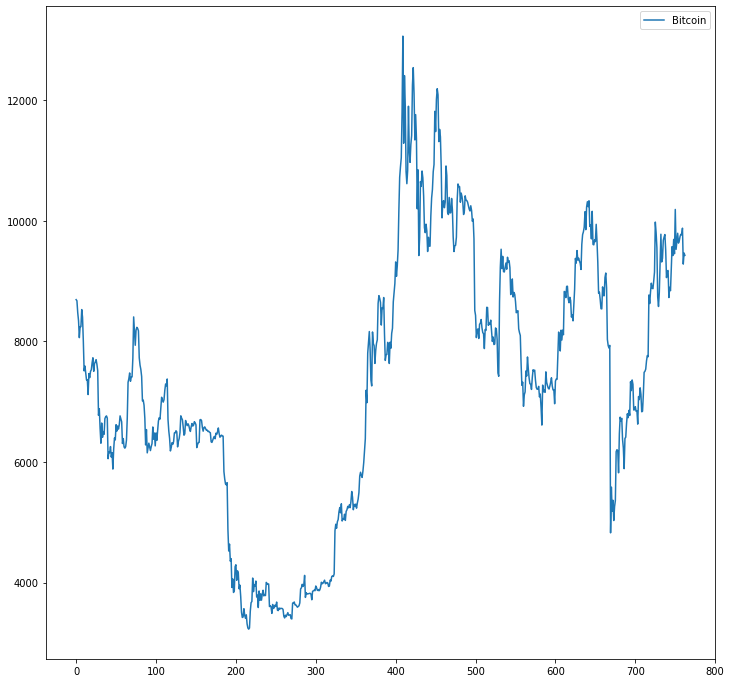

In [0]:
#Plotting the data
bitcoin.plot(y = ['Bitcoin'], kind = 'line', figsize = (12,12) )

**Gold**

In [0]:
#Importing the gold dataset
gold = pd.read_csv("/content/gold-Current.csv", delimiter = ",")

#Keeping only the Date ("Market") and Price ("Perth Mint Spot.12") columns
gold = gold[["Market","Perth Mint Spot.12"]]
gold = gold.dropna()

#Getting rid of the descriptive rows
gold = gold.drop(gold.index[0:16])

#Converting to datetime
gold['Market'] = pd.to_datetime(gold['Market'])

#Making the df more easy to manipulate by changing the column names
gold.rename(columns = {"Market" : "Date"}, inplace = True)
gold.rename(columns = {"Perth Mint Spot.12" : "Gold"}, inplace = True)

#Setting the type to float64 to allow for plotting, analysis and comparison
gold["Gold"]=gold["Gold"].astype('float64')
gold

,Date,Gold
23,2016-01-20,1087.22
24,2016-01-21,1096.70
25,2016-01-22,1094.51
28,2016-01-25,1097.10
30,2016-01-27,1115.29
...,...,...
1610,2020-05-25,1723.94
1611,2020-05-26,1726.62
1612,2020-05-27,1705.20
1613,2020-05-28,1712.27


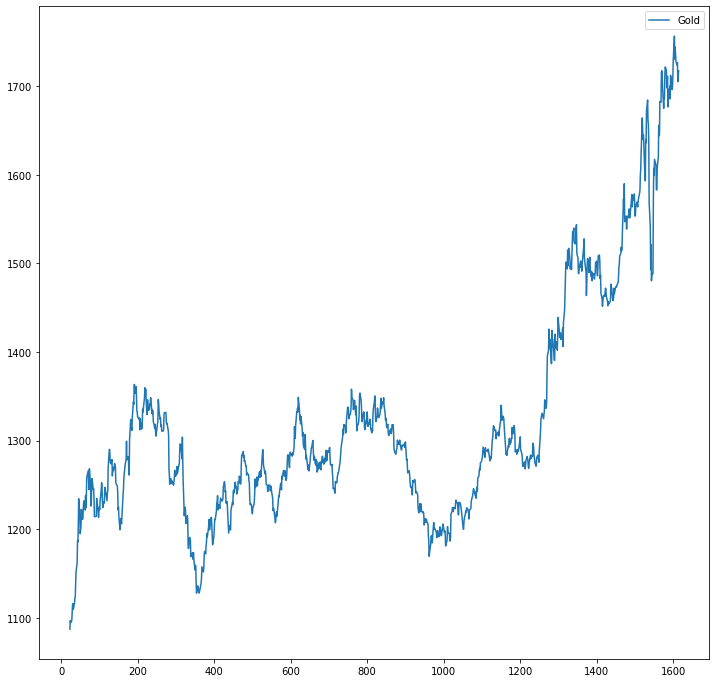

In [0]:
#Plotting the data
gold.plot(y = ['Gold'], kind = 'line', figsize = (12,12) )

**Ethereum**

In [0]:
#Importing the ETH dataset
ETH = pd.read_csv("/content/ETH_USD Bitfinex Historical Data.csv", delimiter = ",")

#Keeping only the Date and Price columns
ETH = ETH [["Date", "Price"]]

#Making the df more easy to manipulate by changing the column names
ETH.rename(columns = {"Price" : "ETH"}, inplace = True)

#putting the data in chronological order
ETH = ETH [::-1]
ETH.reset_index(drop = True, inplace = True)

#Converting to datetime
ETH["Date"] = pd.to_datetime(ETH['Date'])

ETH

,Date,ETH
0,2018-05-13,728.78
1,2018-05-14,727.41
2,2018-05-15,705.06
3,2018-05-16,706.89
4,2018-05-17,667.84
...,...,...
758,2020-06-09,243.71
759,2020-06-10,248.14
760,2020-06-11,230.22
761,2020-06-12,237.65


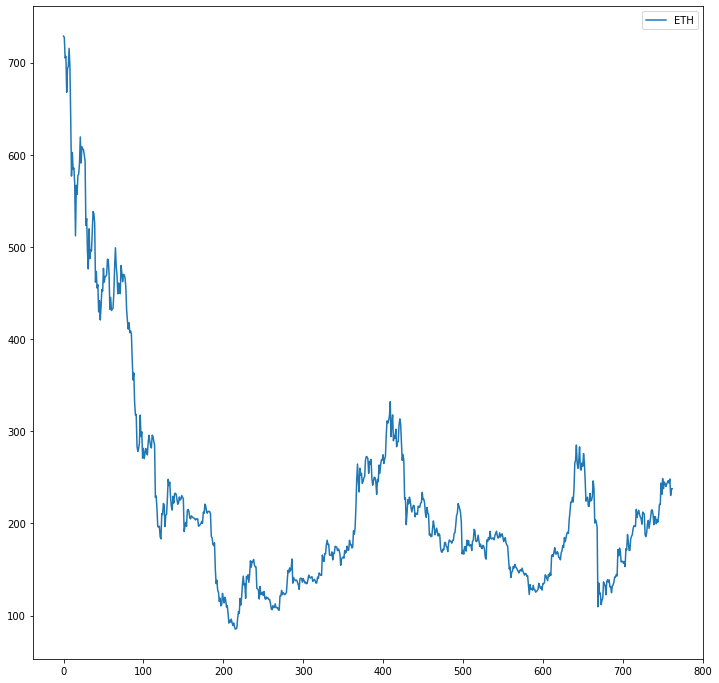

In [0]:
#Plotting the data
ETH.plot(y = ['ETH'], kind = 'line', figsize = (12,12) )

**SP**

In [0]:
#Importing the SP dataset
SP = pd.read_csv("/content/^GSPC (1).csv")

#Keeping only the Date and Price columns
SP = SP[["Date", "Close"]]

#Converting to datetime
SP["Date"] = pd.to_datetime(SP["Date"])

#Setting the type to float64 to allow for plotting, analysis and comparison
SP["Close"]=SP["Close"].astype('float64')

#Making the df more easy to manipulate by changing the column names
SP.rename(columns = {"Close" : "SP"}, inplace = True)

SP

,Date,SP
0,2018-06-13,2775.629883
1,2018-06-14,2782.489990
2,2018-06-15,2779.659912
3,2018-06-18,2773.750000
4,2018-06-19,2762.590088
...,...,...
499,2020-06-08,3232.389893
500,2020-06-09,3207.179932
501,2020-06-10,3190.139893
502,2020-06-11,3002.100098


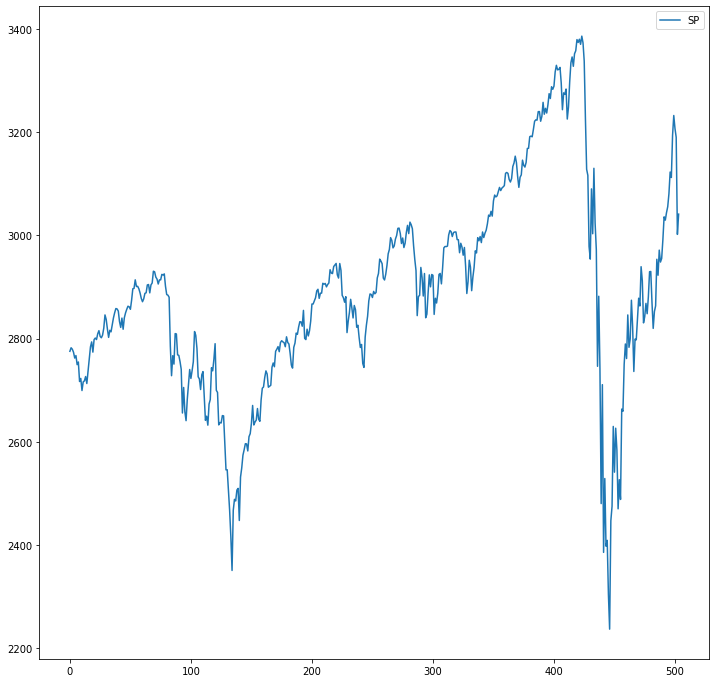

In [0]:
#Plotting the data
SP.plot(y = ['SP'], kind = 'line', figsize = (12,12) )

**Dollar - Yuan exchange rate**

In [0]:
#Importing the Dollar to Yuan dataset
Dollar_to_Yuan = pd.read_csv("/content/USD_CNY Historical Data.csv")

#Keeping only the Date and Price columns
Dollar_to_Yuan = Dollar_to_Yuan[["Date","Price"]]

#Converting to datetime
Dollar_to_Yuan["Date"]= pd.to_datetime(Dollar_to_Yuan["Date"])

#Setting the type to float64 to allow for plotting, analysis and comparison
Dollar_to_Yuan["Price"]=Dollar_to_Yuan["Price"].astype('float64')

#Making the df more easy to manipulate by changing the column names
Dollar_to_Yuan.rename(columns = {"Price" : "DtoY"}, inplace = True)

#putting the data in chronological order
Dollar_to_Yuan = Dollar_to_Yuan[::-1]

Dollar_to_Yuan

#weekends missing (closed stock exchange)

,Date,DtoY
541,2018-05-14,6.3392
540,2018-05-15,6.3777
539,2018-05-16,6.3715
538,2018-05-17,6.3671
537,2018-05-18,6.3800
...,...,...
4,2020-06-08,7.0715
3,2020-06-09,7.0773
2,2020-06-10,7.0609
1,2020-06-11,7.0650


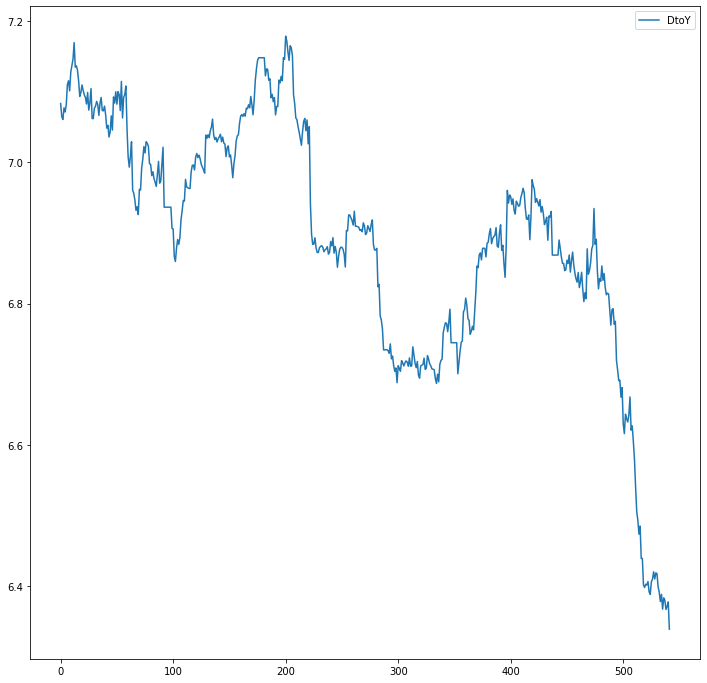

In [0]:
#Plotting the data
Dollar_to_Yuan.plot(y = ['DtoY'], kind = 'line', figsize = (12,12) )

# **Step 2: Creating and exploring the final data frame**

Merging the datasets and creating the final df

Exploring the correlations between the variables

**Merging the datasets**

In [0]:
# Combining the datasets by merging them two at a time, on the common "Date" feature
merge1 = pd.merge(gold,ETH, on = "Date")
merge2 = pd.merge(merge1,SP, on = "Date")
merge3 = pd.merge(merge2, Dollar_to_Yuan, on = "Date")

#Creating the final dataset
df = pd.merge(merge3, bitcoin, on = "Date")

#Setting date as the index
df.set_index('Date', inplace=True)
df = df.sort_index()
df

#weekends missing

,Gold,ETH,SP,DtoY,Bitcoin
Date,,,,,
2018-06-13,1292.45,476.15,2775.629883,6.3983,6312.3
2018-06-14,1297.47,519.69,2782.489990,6.4017,6647.1
2018-06-15,1298.56,487.27,2779.659912,6.4394,6410.3
2018-06-18,1277.93,517.64,2773.750000,6.4394,6719.8
2018-06-19,1279.22,538.47,2762.590088,6.4852,6752.4
...,...,...,...,...,...
2020-06-01,1572.72,248.62,3055.729980,7.1278,10189.3
2020-06-02,1553.67,237.61,3080.820068,7.1014,9527.6
2020-06-03,1671.34,244.83,3122.870117,7.1157,9667.2


**Exploring the final df**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2018-06-13 to 2020-06-05
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gold     427 non-null    float64
 1   ETH      427 non-null    float64
 2   SP       427 non-null    float64
 3   DtoY     427 non-null    float64
 4   Bitcoin  427 non-null    float64
dtypes: float64(5)
memory usage: 20.0 KB


In [0]:
df.describe()

,Gold,ETH,SP,DtoY,Bitcoin
count,427.000000,427.000000,427.000000,427.000000,427.000000
mean,1385.889930,210.903724,2878.041187,6.905622,7111.962529
std,151.166564,93.613906,195.985699,0.150244,2253.475884
min,1169.470000,85.200000,2237.399902,6.398300,3247.800000
25%,1271.460000,146.695000,2768.280029,6.810350,5547.950000
50%,1324.140000,186.870000,2876.320068,6.905900,7029.100000
75%,1496.925000,232.000000,2985.614990,7.031400,8791.700000
max,1756.590000,538.470000,3386.149902,7.169700,13063.800000


**Displaying the correlations**

In [0]:
#Computing the correlations between the different values
df.corr()

,Gold,ETH,SP,DtoY,Bitcoin
Gold,1.000000,-0.221828,0.403758,0.589923,0.468127
ETH,-0.221828,1.000000,0.046276,-0.381186,0.328431
SP,0.403758,0.046276,1.000000,0.287624,0.604156
DtoY,0.589923,-0.381186,0.287624,1.000000,0.527712
Bitcoin,0.468127,0.328431,0.604156,0.527712,1.000000


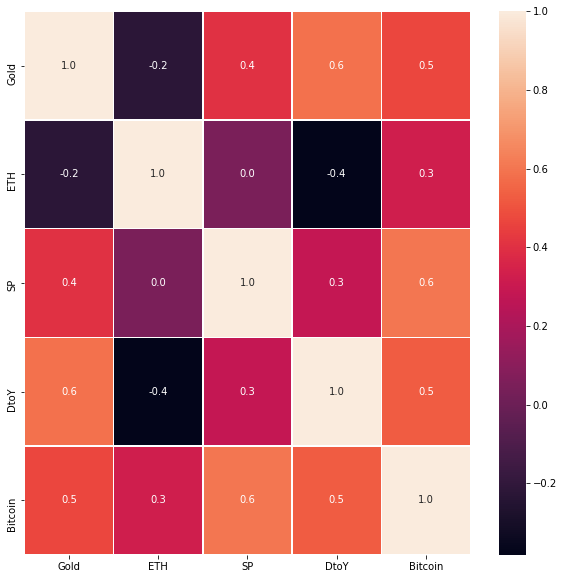

In [0]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths= 0.5, fmt = ".1f", ax = ax)
plt.show()

**Plotting the entire data**

Text(0, 0.5, 'Price')

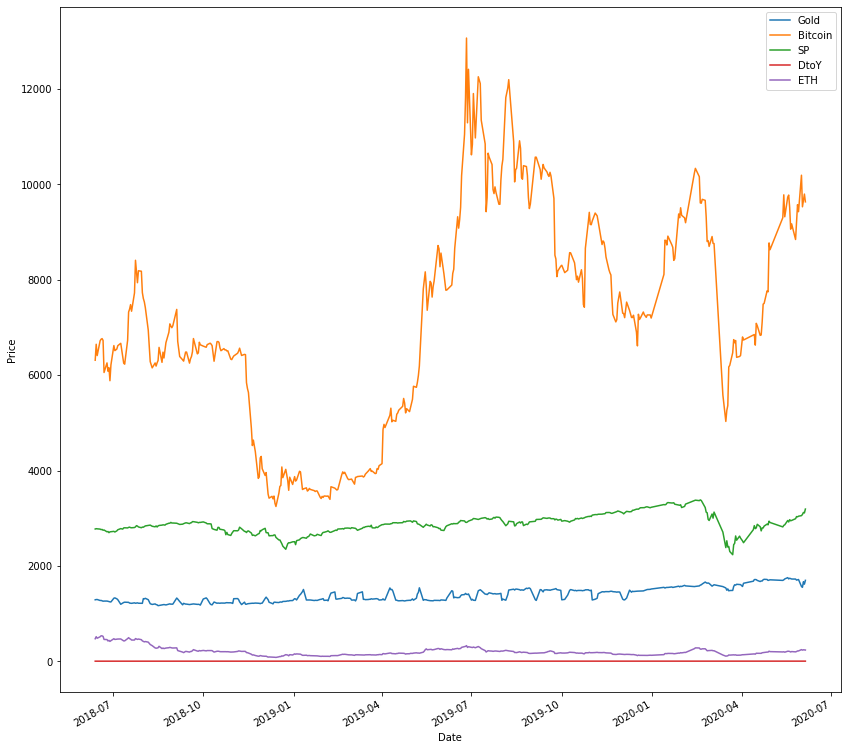

In [0]:
df.plot(y = ['Gold','Bitcoin', 'SP', 'DtoY', 'ETH'], kind = 'line', figsize = (14,14) )
plt.xlabel('Date')
plt.ylabel('Price')

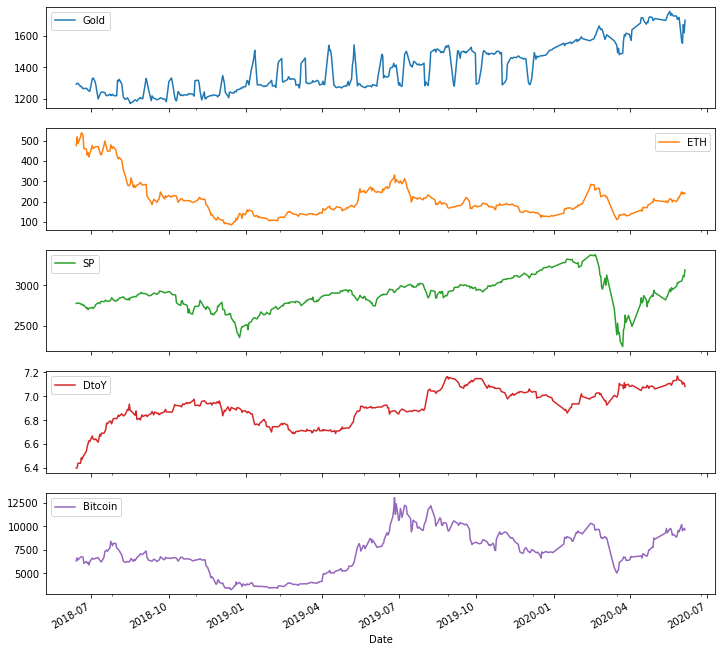

In [0]:
df[["Gold", "ETH","SP","DtoY","Bitcoin"]].plot(subplots=True, figsize=(12, 12)); plt.legend(loc = 2)

# **Step 3 : Creating the VAR Model**
Creating the data frames

Testing and adjusting for stationarity of the variables

Choosing the appropriate parameter


In [0]:
# Importing statsmodels for time series modelization tools (tests, plots and forecasting methods) for database manipulation ; numpy for algebra 
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic, bic
import numpy as np

**Creating the dataframes**

In [0]:
# Creating a training dataframe
df_train = df[0:350]
df_train

,Gold,ETH,SP,DtoY,Bitcoin
Date,,,,,
2018-06-13,1292.45,476.15,2775.629883,6.3983,6312.3
2018-06-14,1297.47,519.69,2782.489990,6.4017,6647.1
2018-06-15,1298.56,487.27,2779.659912,6.4394,6410.3
2018-06-18,1277.93,517.64,2773.750000,6.4394,6719.8
2018-06-19,1279.22,538.47,2762.590088,6.4852,6752.4
...,...,...,...,...,...
2019-12-20,1475.98,128.90,3221.219971,7.0068,7196.4
2019-12-23,1478.44,128.13,3224.010010,7.0127,7322.8
2019-12-24,1485.73,128.04,3223.379883,7.0075,7268.3


In [0]:
# Creating a testing dataframe with the remaining data
df_test = df[351:]
df_test

,Gold,ETH,SP,DtoY,Bitcoin
Date,,,,,
2019-12-31,1518.35,129.45,3230.780029,6.9632,7196.4
2020-01-13,1553.58,143.55,3288.129883,6.8937,8111.4
2020-01-14,1538.89,164.98,3283.149902,6.8841,8829.2
2020-01-15,1547.97,166.05,3289.290039,6.8909,8818.3
2020-01-16,1552.48,164.03,3316.810059,6.8789,8726.9
...,...,...,...,...,...
2020-06-01,1572.72,248.62,3055.729980,7.1278,10189.3
2020-06-02,1553.67,237.61,3080.820068,7.1014,9527.6
2020-06-03,1671.34,244.83,3122.870117,7.1157,9667.2


**Testing for stationarity**

In [0]:
#AD Fuller test on all components of the final data : this will help us verify that the series are non-stationary and need to be differentiated
adfuller(bitcoin['Bitcoin'])
#Here, t t-test value is higher than the confidence interval thresholds --> the data is not stationary

(-1.6603736253198789,
 0.45163604814574465,
 1,
 761,
 {'1%': -3.4389722010249386,
  '10%': -2.5687964010457227,
  '5%': -2.8653454308425705},
 10600.938898282291)

In [0]:
adfuller(gold['Gold'])
#Here, t t-test value is higher than the confidence interval thresholds --> the data is not stationary

(0.38373703716553886,
 0.9808764724785479,
 18,
 1104,
 {'1%': -3.436287110400734,
  '10%': -2.5681657829565743,
  '5%': -2.864161528982321},
 8376.700794540147)

In [0]:
adfuller(ETH['ETH'])
#Here, t t-test value is higher than the confidence interval thresholds --> the data is not stationary

(-3.3173484333533776,
 0.014120586157751927,
 18,
 744,
 {'1%': -3.4391698996357687,
  '10%': -2.568842816582842,
  '5%': -2.8654325580580204},
 5679.3526586124535)

In [0]:
adfuller(SP['SP'])
#Here, t t-test value is higher than the confidence interval thresholds --> the data is not stationary

(-2.8950318319406176,
 0.045928785560319346,
 9,
 494,
 {'1%': -3.4436568932270095,
  '10%': -2.5698956806372832,
  '5%': -2.8674084917497074},
 4964.355828075667)

In [0]:
adfuller(Dollar_to_Yuan['DtoY'])
#Here, t t-test value is higher than the confidence interval thresholds --> the data is not stationary
#We have thus concluded that all series are non-stationary --> we should differenciate them

(-2.8032761604328003,
 0.05780731362136035,
 2,
 539,
 {'1%': -3.4425405682241816,
  '10%': -2.5696338432333636,
  '5%': -2.8669171671779816},
 -2651.9598377235725)

**Differenciating the data**

In [0]:
# Differenciating the data by differenciating each of the components (we know that a multivariate time series is stationary if all its components are stationary)
bitcoin_differenciated = bitcoin.diff().dropna()
adfuller(bitcoin_differenciated["Bitcoin"])

#Here, we observe that the t-test is smaller than the confidence interval thresholds --> the series is now stationary

(-30.37210896219483,
 0.0,
 0,
 761,
 {'1%': -3.4389722010249386,
  '10%': -2.5687964010457227,
  '5%': -2.8653454308425705},
 10588.030251665681)

In [0]:
gold_differenciated = gold.diff().dropna()
adfuller(gold_differenciated["Gold"])

#Here, we observe that the t-test is smaller than the confidence interval thresholds --> the series is now stationary

(-8.55671342612528,
 8.918580036105448e-14,
 17,
 1104,
 {'1%': -3.436287110400734,
  '10%': -2.5681657829565743,
  '5%': -2.864161528982321},
 8368.390916061366)

In [0]:
ETH_differenciated = ETH.diff().dropna()
adfuller(ETH_differenciated["ETH"])

#Here, we observe that the t-test is smaller than the confidence interval thresholds --> the series is now stationary

(-5.633437080160992,
 1.0764274623778873e-06,
 17,
 744,
 {'1%': -3.4391698996357687,
  '10%': -2.568842816582842,
  '5%': -2.8654325580580204},
 5678.036136065164)

In [0]:
SP_differenciated = SP.diff().dropna()
adfuller(SP_differenciated["SP"])

#Here, we observe that the t-test is smaller than the confidence interval thresholds --> the series is now stationary

(-5.9821760329004094,
 1.827495335036824e-07,
 8,
 494,
 {'1%': -3.4436568932270095,
  '10%': -2.5698956806372832,
  '5%': -2.8674084917497074},
 4961.075841162338)

In [0]:
DtoY_differenciated = Dollar_to_Yuan.diff().dropna()
adfuller(DtoY_differenciated["DtoY"])

#Here, we observe that the t-test is smaller than the confidence interval thresholds --> the series is now stationary

(-15.70930814641793,
 1.365665667105913e-28,
 1,
 539,
 {'1%': -3.4425405682241816,
  '10%': -2.5696338432333636,
  '5%': -2.8669171671779816},
 -2638.0285134930846)

In [0]:
#Now that all composing series are stationary, we can conclude that the main series will be stationary after one differenciation
df_differenced = df_train.diff().dropna()

#This is now the complete differenciated series

**Choosing the parameter for the model**

In [0]:
#Creating the model and testing for the best parameters using the AIC function (a prediction quality criterion - prediction optimized at the smallest aic value)
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)

# Numbers 2 and 4 seem to yield the most interesting results

Lag Order = 1
AIC :  22.855524314109527
Lag Order = 2
AIC :  22.83627468200728
Lag Order = 3
AIC :  22.873629111927762
Lag Order = 4
AIC :  22.857735595386508
Lag Order = 5
AIC :  22.881365296742118
Lag Order = 6
AIC :  22.952762389332435
Lag Order = 7
AIC :  22.993592381632244
Lag Order = 8
AIC :  23.08971610354307
Lag Order = 9
AIC :  23.161094492385885


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


# **Step 4 : Fitting and forecasting**

Fitting the model using the parameters

Predicting the test dataset

**Fitting the model**

In [0]:
# Fitting the model using the chosen parameters
# When the model is fitted with the parameters chosen by the tests (2 and 4), the prediction line is flat.
# This seems normal, given that this data is extremely hard to predict. 
# In this case, forecasting for the short term variations seems very complex, but the model seems to be able to forecast long-term trends
# We thus realized that the most accurate predictions occur for high model parameters
# So after trying different parameters through trial and error, we found that the most accurate prediction was for "45"
model_fitted = model.fit(45)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jun, 2020
Time:                     11:28:42
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    36.5396
Nobs:                     304.000    HQIC:                   28.2500
Log likelihood:          -4480.68    FPE:                6.32043e+10
AIC:                      22.7230    Det(Omega_mle):     3.92406e+09
--------------------------------------------------------------------
Results for equation Gold
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               7.498326         3.980138            1.884           0.060
L1.Gold            -0.452114         0.112005           -4.037           0.000
L1.ETH              0.357921         0.678503            0.528       

**Forecasting**

In [0]:
# Create the forecasting data, specifying the number of data points to predicy (here, 50)
forecast_input = df_differenced.values[-50:]
forecast_input

array([[ 1.7780000e+01, -1.4500000e+00,  1.8729981e+01, -1.6200000e-02,
        -4.4000000e+00],
       [-2.2230000e+01, -4.9200000e+00,  2.8020019e+01, -4.8700000e-02,
        -2.0900000e+02],
       [ 5.8900000e+00, -6.1200000e+00,  2.9530030e+01,  1.4300000e-02,
        -1.8610000e+02],
       [-1.0110000e+01, -6.0200000e+00, -5.9899910e+00,  1.1700000e-02,
        -1.6680000e+02],
       [ 6.2100000e+00,  2.4900000e+00,  8.2600100e+00, -1.6100000e-02,
         7.2900000e+01],
       [ 1.8500000e+00, -3.8500000e+00, -1.1750000e+01,  4.3000000e-03,
        -1.2480000e+02],
       [-5.6000000e-01,  1.3800000e+00,  2.0520020e+01, -5.5000000e-03,
         2.5970000e+02],
       [-5.6200000e+00, -3.2000000e+00, -1.0729981e+01,  7.0000000e-04,
        -1.7680000e+02],
       [ 4.9300000e+00, -8.8500000e+00,  8.5300300e+00, -1.1300000e-02,
        -5.5440000e+02],
       [ 1.8000000e+00, -1.7900000e+00,  5.7700190e+00,  3.4000000e-03,
        -5.4300000e+01],
       [ 1.1980000e+01,  2.077

In [0]:
# Computing the forecast for the 50 next data points
nobs = 50
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Gold_1d,ETH_1d,SP_1d,DtoY_1d,Bitcoin_1d
Date,,,,,
2020-02-28,76.477306,3.975647,27.275856,-0.025613,-65.811879
2020-03-02,-112.150721,16.727944,-8.201193,-0.026045,390.905821
2020-03-03,-76.908149,-17.997700,1.150800,0.034272,-159.243874
2020-03-04,-73.948192,9.780215,10.619860,-0.003020,269.719733
2020-03-13,8.865918,-8.210035,12.667058,-0.001776,-184.550245
2020-03-16,117.404887,-6.971234,-23.282526,-0.019079,-60.029010
2020-03-17,-10.367786,21.016749,-9.806776,0.003259,247.010275
2020-03-18,47.752119,-2.498138,42.418321,-0.011010,-83.385510
2020-03-19,27.941388,15.147287,-21.105309,0.021141,496.853015


In [0]:
# Transforming the data back to normal (canceling the diff function)
def invert_transformation(df_train, df_forecast):
    df_fc = df_forecast.copy()
    for col in df_train.columns:        
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_train, df_forecast)        
df_results.loc[:, ['Gold_forecast','ETH_forecast','SP_forecast','DtoY_forecast','Bitcoin_forecast']]

,Gold_forecast,ETH_forecast,SP_forecast,DtoY_forecast,Bitcoin_forecast
Date,,,,,
2020-02-28,1584.617306,130.895647,3267.295876,6.970187,7195.888121
2020-03-02,1472.466584,147.623591,3259.094682,6.944142,7586.793943
2020-03-03,1395.558435,129.625891,3260.245483,6.978414,7427.550068
2020-03-04,1321.610243,139.406106,3270.865342,6.975394,7697.269802
2020-03-13,1330.476161,131.196072,3283.532400,6.973618,7512.719557
2020-03-16,1447.881048,124.224838,3260.249874,6.954539,7452.690548
2020-03-17,1437.513262,145.241587,3250.443097,6.957798,7699.700822
2020-03-18,1485.265381,142.743449,3292.861419,6.946788,7616.315313
2020-03-19,1513.206769,157.890736,3271.756110,6.967929,8113.168328


In [0]:
# Creating a final database with the actual values and the forecasts
final = pd.merge(df_results, df, on = 'Date')
final

,Gold_1d,ETH_1d,SP_1d,DtoY_1d,Bitcoin_1d,Gold_forecast,ETH_forecast,SP_forecast,DtoY_forecast,Bitcoin_forecast,Gold,ETH,SP,DtoY,Bitcoin
Date,,,,,,,,,,,,,,,
2020-02-28,76.477306,3.975647,27.275856,-0.025613,-65.811879,1584.617306,130.895647,3267.295876,6.970187,7195.888121,1635.77,228.43,2954.219971,6.9920,8697.5
2020-03-02,-112.150721,16.727944,-8.201193,-0.026045,390.905821,1472.466584,147.623591,3259.094682,6.944142,7586.793943,1578.56,232.52,3090.229980,6.9610,8904.8
2020-03-03,-76.908149,-17.997700,1.150800,0.034272,-159.243874,1395.558435,129.625891,3260.245483,6.978414,7427.550068,1593.26,224.33,3003.370117,6.9620,8761.4
2020-03-04,-73.948192,9.780215,10.619860,-0.003020,269.719733,1321.610243,139.406106,3270.865342,6.975394,7697.269802,1607.49,225.10,3130.120117,6.9262,8757.9
2020-03-13,8.865918,-8.210035,12.667058,-0.001776,-184.550245,1330.476161,131.196072,3283.532400,6.973618,7512.719557,1569.36,135.21,2711.020020,7.0086,5584.3
2020-03-16,117.404887,-6.971234,-23.282526,-0.019079,-60.029010,1447.881048,124.224838,3260.249874,6.954539,7452.690548,1540.50,111.76,2386.129883,6.9934,5030.0
2020-03-17,-10.367786,21.016749,-9.806776,0.003259,247.010275,1437.513262,145.241587,3250.443097,6.957798,7699.700822,1493.00,116.32,2529.189941,7.0079,5261.1
2020-03-18,47.752119,-2.498138,42.418321,-0.011010,-83.385510,1485.265381,142.743449,3292.861419,6.946788,7616.315313,1521.01,118.64,2398.100098,7.0474,5361.4
2020-03-19,27.941388,15.147287,-21.105309,0.021141,496.853015,1513.206769,157.890736,3271.756110,6.967929,8113.168328,1480.38,136.50,2409.389893,7.1083,6172.0


Text(0, 0.5, 'Price')

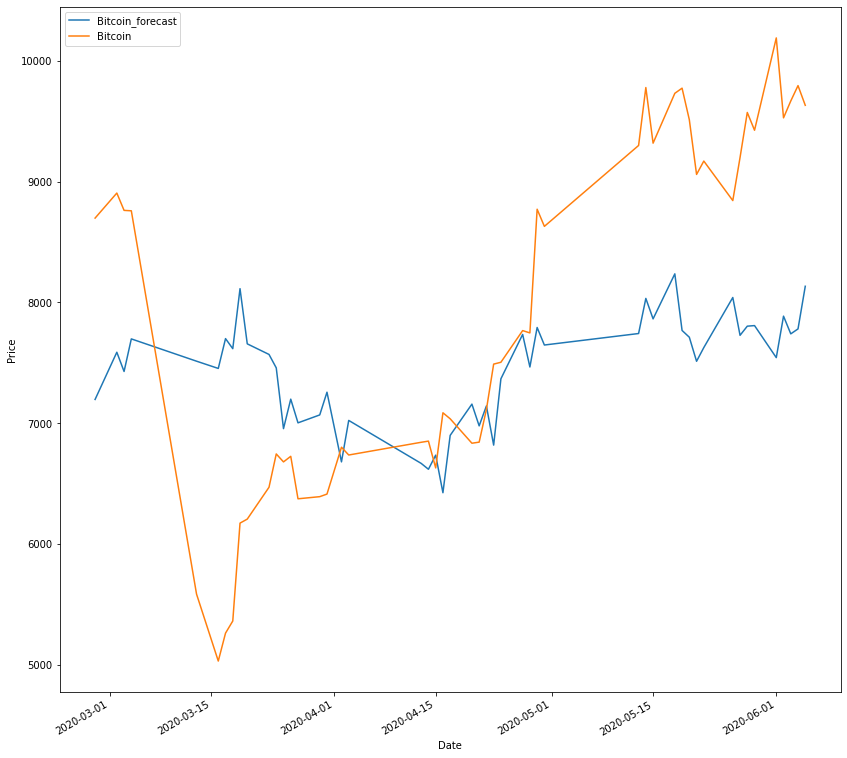

In [0]:
#Plotting the final results
final.plot(y = ['Bitcoin_forecast','Bitcoin'], kind = 'line', figsize = (14,14) )
plt.xlabel('Date')
plt.ylabel('Price')